In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
Orders = pd.read_csv('data/Orders.csv') 
Returns = pd.read_csv('data/Returns.csv')

In [184]:
# Merge orders and returns
Returns=Returns.rename(columns = {'Order ID':'Order.ID'})
Orders = pd.merge(Orders, Returns,how='outer',on='Order.ID')
Orders.Returned = Orders.Returned.replace(np.nan,'No')
# Convert to date type
Orders['Order.Date'] = pd.to_datetime(Orders['Order.Date'])
Orders['Ship.Date'] = pd.to_datetime(Orders['Ship.Date'])
Orders['Order_Month'] = Orders['Order.Date'].dt.month
Orders['Order_Year'] = Orders['Order.Date'].dt.year
# Convert to float type
Orders.Profit = Orders.Profit.str.replace('$','').str.replace(',','').astype(float)
Orders.Sales = Orders.Sales.str.replace('$','').str.replace(',','').astype(float)
Orders = Orders.drop('Region_y', 1)

In [185]:
pd.set_option('display.max_columns', 100)
Orders.head(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order_Month,Order_Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,No,11,2014
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,No,11,2014
2,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,No,2,2014
3,26339,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,TEC-CO-3594,Technology,Copiers,"Brother Fax and Copier, Laser",344.68,2,0.1,34.42,65.35,Critical,No,2,2014
4,26340,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,OFF-ST-5697,Office Supplies,Storage,"Rogers Folders, Wire Frame",133.92,5,0.1,-6.03,41.64,Critical,No,2,2014
5,26342,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,TEC-AC-4152,Technology,Accessories,"Enermax Flash Drive, Erganomic",70.79,2,0.1,25.13,10.48,Critical,No,2,2014
6,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,No,10,2014
7,25334,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-3152,Technology,Phones,"Apple Speaker Phone, VoIP",333.15,3,0.1,88.80,71.02,Medium,No,10,2014
8,25333,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,OFF-FA-5468,Office Supplies,Fasteners,"OIC Paper Clips, Assorted Sizes",64.15,6,0.1,22.03,5.98,Medium,No,10,2014
9,25331,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,OFF-BI-4828,Office Supplies,Binders,"Ibico Index Tab, Clear",16.04,2,0.1,-1.30,2.25,Medium,No,10,2014


In [186]:
Orders.describe()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order_Month,Order_Year
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,28.610970,26.478567,7.516027,2013.777208
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,174.341066,57.251373,3.300526,1.098931
min,1.00000,1040.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000,1.000000,2012.000000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,0.000000,2.610000,5.000000,2013.000000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,9.240000,7.790000,8.000000,2014.000000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,36.810000,24.450000,10.000000,2015.000000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000,12.000000,2015.000000


In [187]:
print(Orders.columns)
print(Orders.shape)

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Returned', 'Order_Month',
       'Order_Year'],
      dtype='object')
(51290, 27)


In [67]:
Orders.groupby(['Sub.Category']).count()
np.sum(Orders['Sub.Category'].isnull()

0

In [230]:
Orders['Sub.Category'].value_counts()
#Orders['Product.Name'].value_counts()

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Fasteners      2601
Labels         2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64

In [131]:
#Orders.groupby(['Order_Month','Sub.Category']).agg({'Quantity':'sum'})
Orders.groupby(['Order_Month']).agg({'Quantity':'sum'})

,Quantity
Order_Month,
1,8872
2,7429
3,10390
4,10466
5,13196
6,18009
7,11046
8,17596
9,20479


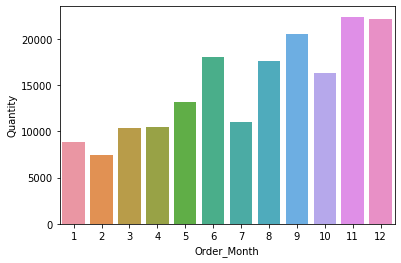

In [132]:
b = Orders.groupby(['Order_Month']).agg({'Quantity':'sum'})
b = b.reset_index()
sns.barplot(x='Order_Month',y='Quantity', data=b)
# It's busy in June, Sep., Nov., and Dec.
# People buy more stuff during the holiday season.
# September is the start time of the school year.

In [133]:
a = Orders.groupby(['Order_Month','Sub.Category']).agg({'Quantity':'sum'})
a = a.reset_index()
# The seasonal trend is the very similar for different categories.
# People might tend to buy stuff at the same time

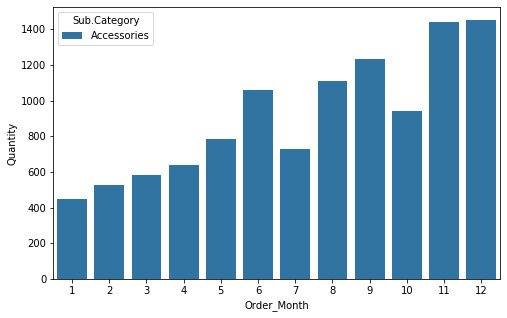

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[a['Sub.Category']=='Accessories'])

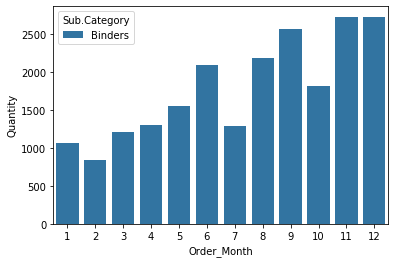

In [137]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Binders')])

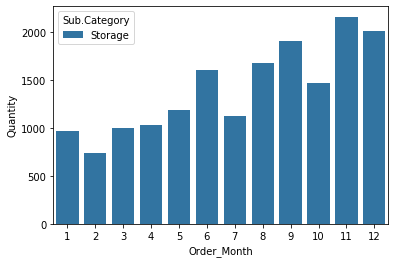

In [138]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Storage')])

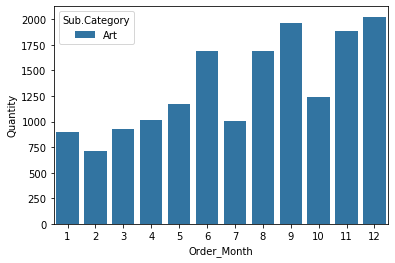

In [139]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Art')])

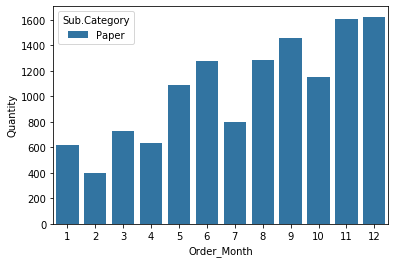

In [140]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Paper')])

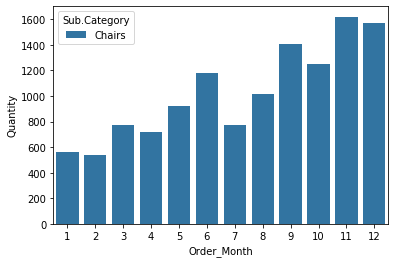

In [141]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Chairs')])

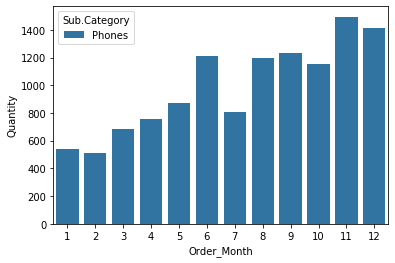

In [142]:
sns.barplot(x='Order_Month',y= 'Quantity', hue='Sub.Category', data=a[(a['Sub.Category']=='Phones')])

In [210]:
#### Beginning of Problem 3
Orders = Orders.rename(columns = {'Region_x':'Region'})
Orders.Returned.value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [191]:
# Prob 3-1
Orders[Orders.Returned=='Yes'].groupby(['Order_Year']).agg({'Profit':'sum'})
# The table shows the profit we lost due to returns

,Profit
Order_Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [205]:
Prob3_2 = Orders[Orders.Returned=='Yes'].groupby(['Customer.ID']).agg({'Row.ID':'count'})
Prob3_2 = Prob3_2.rename(columns = {'Row.ID':'Count'})

In [209]:
len(Prob3_2[Prob3_2.Count>1])
# 547 customers return more than once
len(Prob3_2[Prob3_2.Count>5])
# 46 customers return more than five times

46

In [214]:
Orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order_Month,Order_Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,No,11,2014
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,No,11,2014
2,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,No,2,2014
3,26339,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,TEC-CO-3594,Technology,Copiers,"Brother Fax and Copier, Laser",344.68,2,0.1,34.42,65.35,Critical,No,2,2014
4,26340,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,OFF-ST-5697,Office Supplies,Storage,"Rogers Folders, Wire Frame",133.92,5,0.1,-6.03,41.64,Critical,No,2,2014


In [224]:
Prob3_3 = Orders[Orders.Returned=='Yes'].groupby(['Region']).agg({'Row.ID':'count'})
Prob3_3 = Prob3_3.rename(columns = {'Row.ID':'Count'})
Prob3_3 = Prob3_3.sort_values('Count',ascending=False)
Prob3_3 = Prob3_3.reset_index()

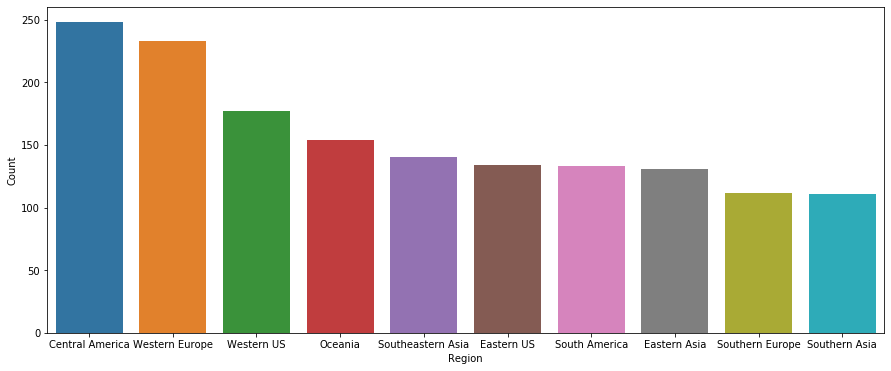

In [228]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y= 'Count', data=Prob3_3.head(10))
# The plot below shows the top 10 regions that are more likely to return orders

In [232]:
#'Sub.Category'
Prob3_4 = Orders[Orders.Returned=='Yes'].groupby(['Sub.Category']).agg({'Row.ID':'count'})
Prob3_4 = Prob3_4.rename(columns = {'Row.ID':'Count'})
Prob3_4 = Prob3_4.sort_values('Count',ascending=False)
Prob3_4 = Prob3_4.reset_index()

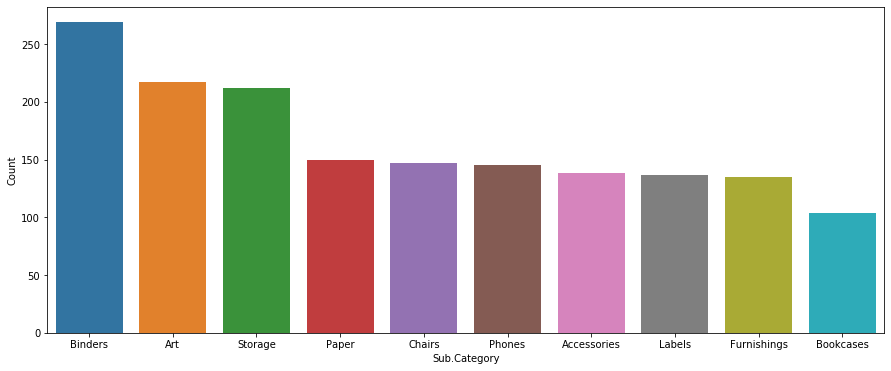

In [234]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sub.Category',y= 'Count', data=Prob3_4.head(10))
# The plot below shows the top 10 categories that are more likely to be returned